In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.decomposition import PCA

In [2]:
# Starting dataset
df = pd.read_csv('customer_dataframe.csv', sep='\t', index_col=0)

selected_features = ['TProd','MeanProdOrder', 'MeanSaleOrder', 'MeanPSale']

df2 = df[selected_features]
df2.head()

,TProd,MeanProdOrder,MeanSaleOrder,MeanPSale
CustomerID,,,,
17850,1702,48.629,151.940,3.960
13047,1355,84.688,193.069,3.926
12583,4978,292.824,389.961,2.140
13748,439,87.800,189.650,3.996
15100,58,9.667,105.850,10.950


In [3]:
df2.info()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4333 entries, 17850 to 12713
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   TProd          4333 non-null   int64  
 1   MeanProdOrder  4333 non-null   float64
 2   MeanSaleOrder  4333 non-null   float64
 3   MeanPSale      4333 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 169.3 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4333 entries, 17850 to 12713
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   TProd           4333 non-null   int64  
 1   DProd           4333 non-null   int64  
 2   MaxPO           4333 non-null   int64  
 3   MinPO           4333 non-null   int64  
 4   MeanProdOrder   4333 non-null   float64
 5   TSale           4333 non-null   float64
 6   MinPSale        4333 non-null   float64
 7   MaxPSale        4333 non-null   float64
 8   MeanSa

# Normalization

In [4]:
scaler = MinMaxScaler()
df_norm = scaler.fit_transform(df2.to_numpy())

# K-MEANS

In [5]:
sse_list = list()
sil_list = list()
davies_list = list()
max_k = 15
for k in tqdm(range(2, max_k + 1), total=max_k - 1, desc="Iterating over possible K values"):
    kmeans_iter = KMeans(n_clusters=k, n_init=10, max_iter=100)
    kmeans_iter.fit(df_norm)
    
    davies_list.append(davies_bouldin_score(df_norm, kmeans_iter.labels_))
    sil_list.append(silhouette_score(df_norm, kmeans_iter.labels_))
    sse = kmeans_iter.inertia_
    sse_list.append(sse)

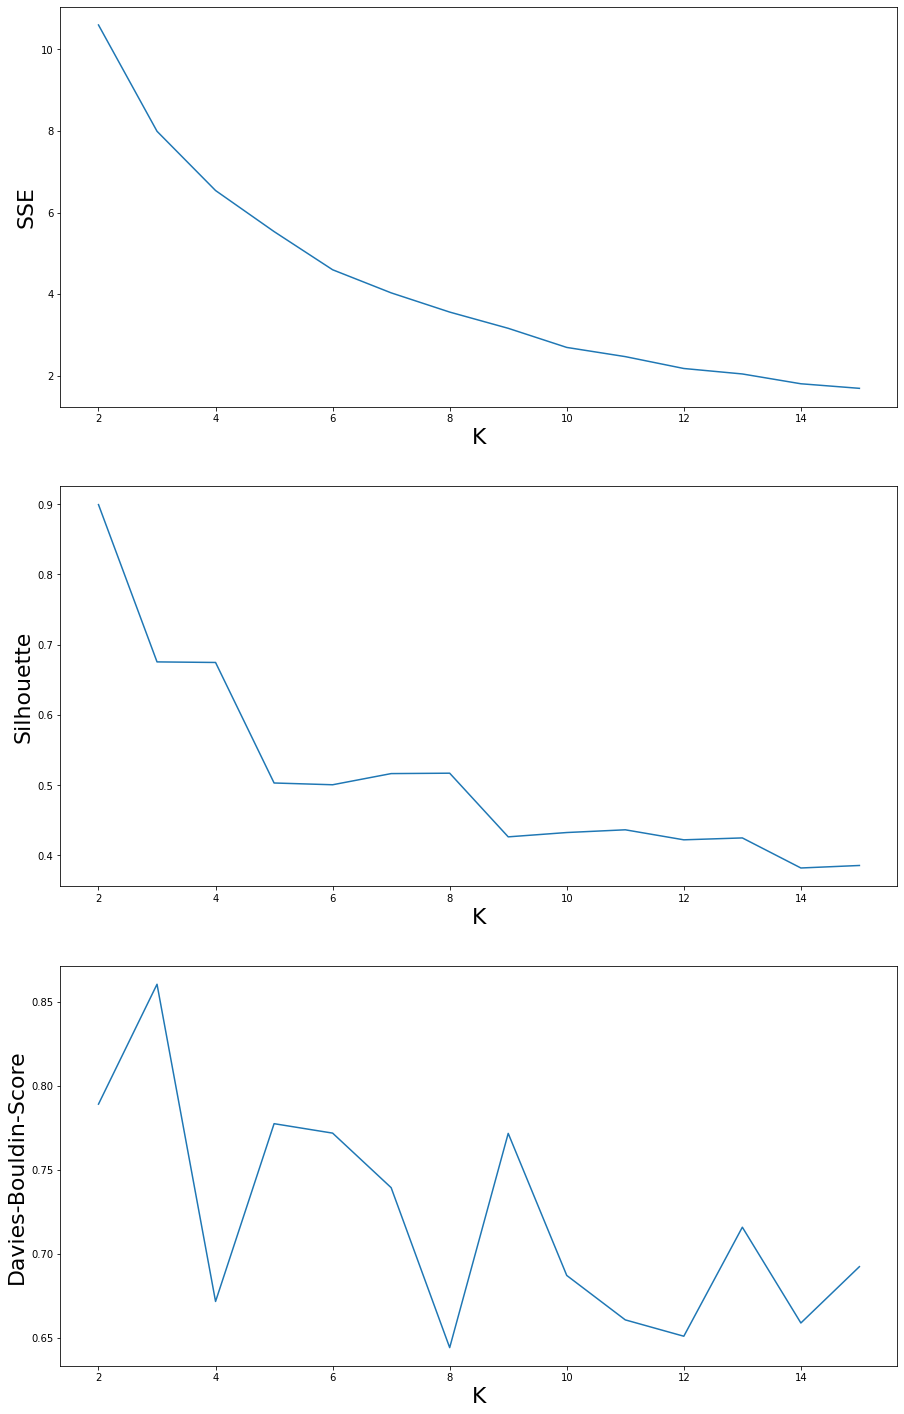

In [6]:
fig, axs = plt.subplots(3,1,figsize=(15,25))
axs[0].plot(range(2, len(sse_list) + 2), sse_list)
axs[0].set_ylabel('SSE', fontsize=22)
axs[0].set_xlabel('K', fontsize=22)
axs[0].tick_params(axis='both', which='major', labelsize=10)

axs[1].plot(range(2, len(sil_list) + 2), sil_list)
axs[1].set_ylabel('Silhouette', fontsize=22)
axs[1].set_xlabel('K', fontsize=22)
axs[1].tick_params(axis='both', which='major', labelsize=10)

axs[2].plot(range(2, len(davies_list) + 2), davies_list)
axs[2].set_ylabel('Davies-Bouldin-Score', fontsize=22)
axs[2].set_xlabel('K', fontsize=22)
axs[2].tick_params(axis='both', which='major', labelsize=10)

In [7]:
k = 4
kmeans = KMeans(n_clusters=k, n_init=100)
kmeans.fit(df_norm)

KMeans(n_clusters=4, n_init=100)

In [8]:
np.unique(kmeans.labels_, return_counts=True)

(array([0, 1, 2, 3]), array([3857,    1,  450,   25], dtype=int64))

In [9]:
print("SSE:",sse_list[k-2]," - SILHOUETTE:",sil_list[k-2])

SSE: 6.539592830108467  - SILHOUETTE: 0.6746843602500764


In [10]:
hist, bins = np.histogram(kmeans.labels_, 
                          bins=range(0, len(set(kmeans.labels_)) + 1))
dict(zip(bins, hist))

{0: 3857, 1: 1, 2: 450, 3: 25}

Text(0.5, 0, 'TProd')

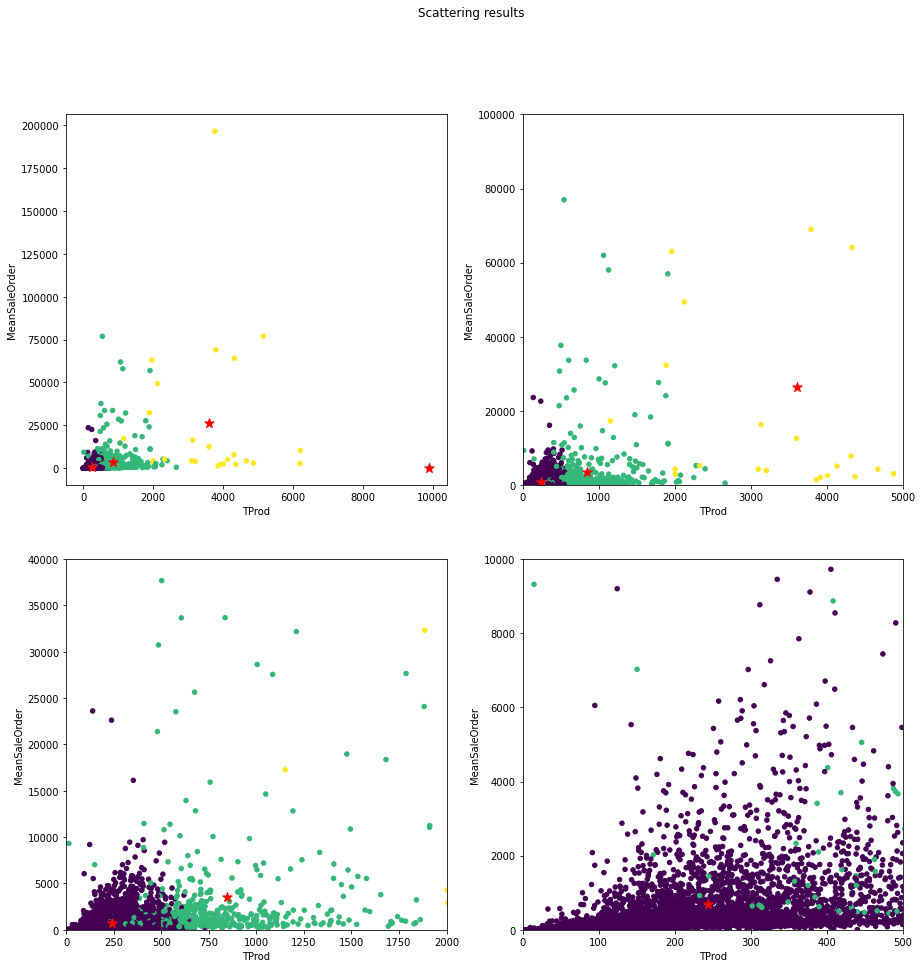

In [27]:
centers = scaler.inverse_transform(kmeans.cluster_centers_)

fig, axs = plt.subplots(2,2,figsize=(15,15))
fig.suptitle('Scattering results')

label_s = 10

col1, i1 = df2['MeanSaleOrder'], 2
col2, i2 = df2['TProd'], 0

axs[0][0].scatter(col1, col2, c=kmeans.labels_, s=20)
axs[0][0].scatter(centers[:, i1], centers[:, i2], s=100, marker='*', c='r')
axs[0][0].tick_params(axis='both', which='major', labelsize=label_s)
axs[0][0].set_ylabel(df2.columns[i1], fontsize=label_s)
axs[0][0].set_xlabel(df2.columns[i2], fontsize=label_s)

axs[0][1].set_xlim((0,5000))
axs[0][1].set_ylim((0,100000))
axs[0][1].scatter(col1, col2, c=kmeans.labels_, s=20)
axs[0][1].scatter(centers[:, i1], centers[:, i2], s=100, marker='*', c='r')
axs[0][1].tick_params(axis='both', which='major', labelsize=label_s)
axs[0][1].set_ylabel(df2.columns[i1], fontsize=label_s)
axs[0][1].set_xlabel(df2.columns[i2], fontsize=label_s)

axs[1][0].set_xlim((0,2000))
axs[1][0].set_ylim((0,40000))
axs[1][0].scatter(col1, col2, c=kmeans.labels_, s=20)
axs[1][0].scatter(centers[:, i1], centers[:, i2], s=100, marker='*', c='r')
axs[1][0].tick_params(axis='both', which='major', labelsize=label_s)
axs[1][0].set_ylabel(df2.columns[i1], fontsize=label_s)
axs[1][0].set_xlabel(df2.columns[i2], fontsize=label_s)

axs[1][1].set_xlim((0,500))
axs[1][1].set_ylim((0,10000))
axs[1][1].scatter(col1, col2, c=kmeans.labels_, s=20)
axs[1][1].scatter(centers[:, i1], centers[:, i2], s=100, marker='*', c='r')
axs[1][1].tick_params(axis='both', which='major', labelsize=label_s)
axs[1][1].set_ylabel(df2.columns[i1], fontsize=label_s)
axs[1][1].set_xlabel(df2.columns[i2], fontsize=label_s)

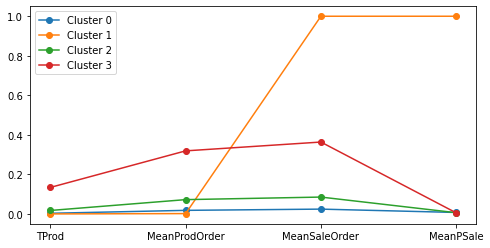

In [30]:
# normalized centers
plt.figure(figsize=(8, 4))
for i in range(0, len(kmeans.cluster_centers_)):
    plt.plot(kmeans.cluster_centers_[i], marker='o', label='Cluster %s' % i)
plt.tick_params(axis='both', which='major', labelsize=label_s)
plt.xticks(range(0, len(df2.columns)), df2.columns, fontsize=label_s)
plt.legend(fontsize=label_s)
plt.show()

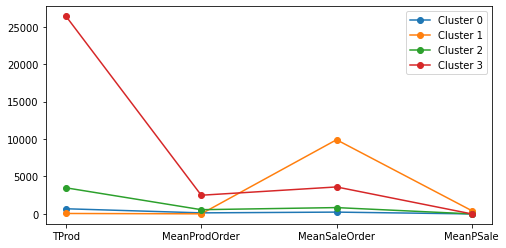

In [13]:
# non normalized centers
plt.figure(figsize=(8, 4))
for i in range(0, len(centers)):
    plt.plot(centers[i], marker='o', label='Cluster %s' % i)
plt.tick_params(axis='both', which='major', labelsize=label_s)
plt.xticks(range(0, len(df2.columns)), df2.columns, fontsize=label_s)
plt.legend(fontsize=label_s)
plt.show()

# ANALYZING RESULTS

In [14]:
df['Cluster'] = kmeans.labels_

clust_list = list()
for i in tqdm(range(len(df['Cluster'].unique())), total=len(df['Cluster'].unique()), desc="Creating cluster dataframes"):
    clust_list.append(df[df['Cluster'] == i])

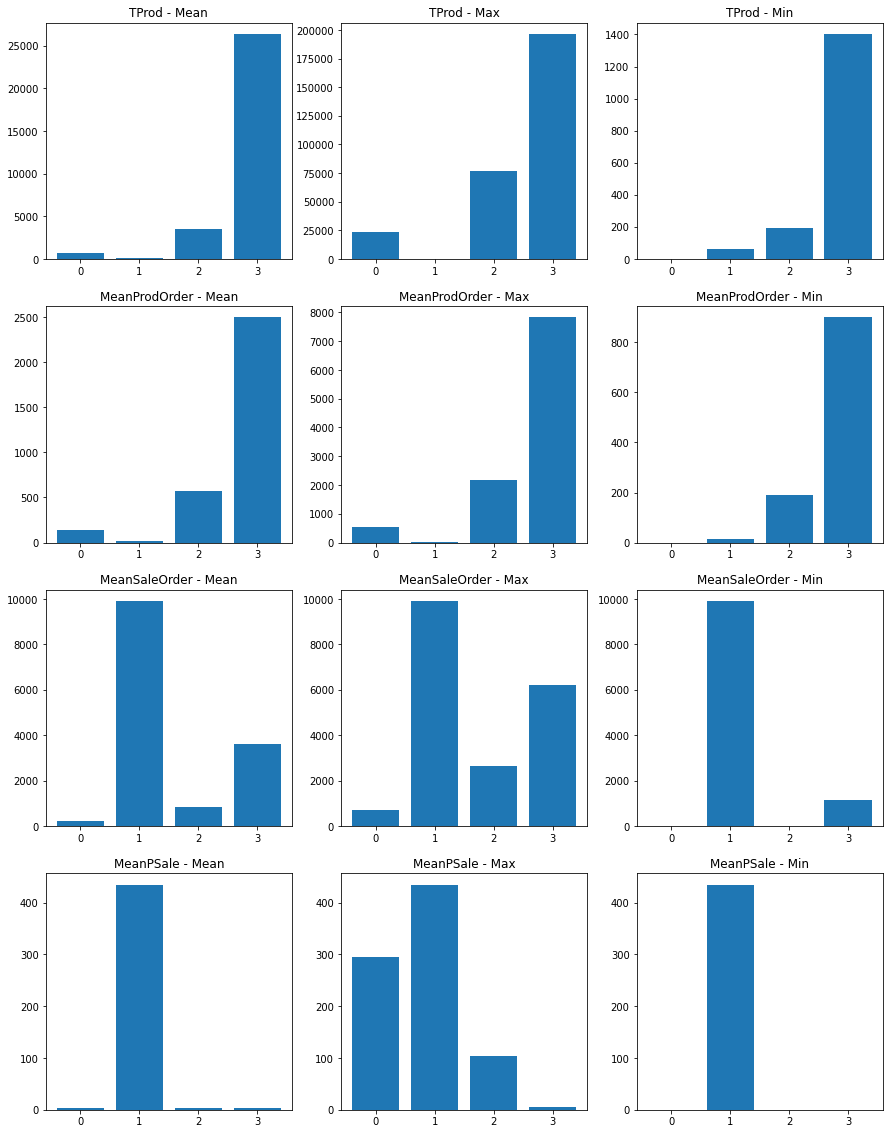

In [15]:
attr = df2.columns
clusters = range(len(clust_list))
fig, axs = plt.subplots(len(attr),3,figsize=(15,20))
for attr_index in range(len(attr)):
    mean_values = []
    max_values = []
    min_values = []
    for cluster_df in clust_list:
        mean_values.append(cluster_df.describe()[attr[attr_index]][1])
        max_values.append(cluster_df.describe()[attr[attr_index]][7])
        min_values.append(cluster_df.describe()[attr[attr_index]][3])
    axs[attr_index][0].bar(clusters, mean_values)
    axs[attr_index][0].set_title(f"{attr[attr_index]} - Mean")
    axs[attr_index][1].bar(clusters, max_values)
    axs[attr_index][1].set_title(f"{attr[attr_index]} - Max")
    axs[attr_index][2].bar(clusters, min_values)
    axs[attr_index][2].set_title(f"{attr[attr_index]} - Min")

In [16]:
hist, bins = np.histogram(kmeans.labels_, 
                          bins=range(0, len(set(kmeans.labels_)) + 1))
clust_dict = dict(zip(bins, hist))
print("Clusters and their population:",clust_dict)

Clusters and their population: {0: 3857, 1: 1, 2: 450, 3: 25}


In [17]:
to_remove = -1
to_englobe = -1

for key in clust_dict.keys():
    if clust_dict[key] == 1:
        to_remove = key
    elif clust_dict[key] == 25:
        to_englobe = key

clust_list[to_englobe].describe()

,TProd,DProd,MaxPO,MinPO,MeanProdOrder,TSale,MinPSale,MaxPSale,MeanSaleOrder,TRProd,MeanPSale,TOrder,SETSaleQta,SESaleQtaOrder,Cluster
count,25.000000,25.000000,25.000000,25.000000,25.00000,25.000000,25.00000,25.000000,25.000000,25.000000,25.00000,25.000000,25.000000,25.000000,25.0
mean,26391.720000,173.600000,5231.200000,1784.480000,2497.25728,49823.296800,590.19840,1947.828800,3603.479040,489.840000,2.60540,13.120000,4.519360,2.160640,3.0
std,43077.095888,265.981672,3873.011533,2011.219678,1488.13966,80039.024866,1199.56193,2059.281683,1326.661174,1552.729658,1.50657,19.839607,2.536763,2.297141,0.0
min,1404.000000,1.000000,1176.000000,1.000000,899.50000,2002.400000,0.39000,69.360000,1152.000000,0.000000,0.40000,1.000000,0.000000,0.000000,3.0
25%,3028.000000,6.000000,2565.000000,24.000000,1404.00000,4314.720000,3.26000,390.000000,2325.680000,0.000000,1.04800,1.000000,2.733000,0.000000,3.0
50%,5256.000000,67.000000,4282.000000,960.000000,2262.00000,7829.890000,25.44000,1188.000000,3789.815000,0.000000,2.54400,3.000000,5.125000,1.585000,3.0
75%,32320.000000,171.000000,5952.000000,2924.000000,2924.00000,53258.430000,138.24000,3202.920000,4327.622000,288.000000,3.34900,17.000000,6.745000,4.087000,3.0
max,196556.000000,1118.000000,15049.000000,7824.000000,7824.00000,278571.620000,3861.00000,7144.720000,6212.725000,7714.000000,5.73100,72.000000,8.037000,6.182000,3.0


In [18]:
clust_list[to_remove]

,TProd,DProd,MaxPO,MinPO,MeanProdOrder,TSale,MinPSale,MaxPSale,MeanSaleOrder,TRProd,MeanPSale,TOrder,SETSaleQta,SESaleQtaOrder,Cluster
CustomerID,,,,,,,,,,,,,,,
15098,61,1,60,1,15.25,39619.5,297.0,38970.0,9904.875,60,434.65,3,2.0,2.0,1


**Since we have a cluster composed of only 1 value and by itself it scales our graphics we would like to englobe it in its most similar cluster which means the cluster having highest mean product sale a part from the singular valued cluster**

In [19]:
clust_list[to_englobe] = clust_list[to_englobe].append(clust_list[to_remove])

In [20]:
clust_list[to_englobe].describe()

,TProd,DProd,MaxPO,MinPO,MeanProdOrder,TSale,MinPSale,MaxPSale,MeanSaleOrder,TRProd,MeanPSale,TOrder,SETSaleQta,SESaleQtaOrder,Cluster
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
mean,25379.000000,166.961538,5032.307692,1715.884615,2401.795462,49430.843077,578.921538,3371.758462,3845.840423,473.307692,19.222500,12.730769,4.422462,2.154462,2.923077
std,42521.481504,262.796877,3927.941128,2001.385247,1537.177345,78447.435901,1176.731588,7535.780193,1793.556165,1523.691853,84.743774,19.539821,2.534143,2.250950,0.392232
min,61.000000,1.000000,60.000000,1.000000,15.250000,2002.400000,0.390000,69.360000,1152.000000,0.000000,0.400000,1.000000,0.000000,0.000000,1.000000
25%,2950.000000,6.000000,2538.000000,21.000000,1401.800250,4327.735000,3.615000,399.600000,2518.260000,0.000000,1.234000,1.000000,2.664750,0.000000,3.000000
50%,5183.000000,60.000000,4281.000000,960.000000,2200.500000,8584.135000,27.840000,1336.000000,3825.407500,0.000000,2.647000,3.000000,4.873500,1.585000,3.000000
75%,28560.000000,165.750000,5724.000000,2870.000000,2913.000000,52547.695000,257.310000,3539.430000,4356.990500,234.000000,3.553000,16.000000,6.617250,4.065250,3.000000
max,196556.000000,1118.000000,15049.000000,7824.000000,7824.000000,278571.620000,3861.000000,38970.000000,9904.875000,7714.000000,434.650000,72.000000,8.037000,6.182000,3.000000


**We can see how adding this single value alters greatly the MeanPSale mean value and this alters the cluster analysis, so we decided to keep this value aside, an outsider-like value wrt our selected metrics**

In [21]:
clust_list[to_englobe] = clust_list[to_englobe].drop(clust_list[to_remove].index, errors='ignore')
clust_list[to_englobe]

,TProd,DProd,MaxPO,MinPO,MeanProdOrder,TSale,MinPSale,MaxPSale,MeanSaleOrder,TRProd,MeanPSale,TOrder,SETSaleQta,SESaleQtaOrder,Cluster
CustomerID,,,,,,,,,,,,,,,
17511,63048,453,4675,20,1401.067,88239.54,1.17,745.00,1960.879,1501,2.307,31,6.922,5.492,3
16754,4280,2,4280,4280,4280.000,2002.40,518.40,1484.00,2002.400,0,0.620,1,1.000,0.000,3
17450,69021,124,12572,6,1380.400,189490.73,6.84,7144.72,3789.815,952,3.621,46,7.237,5.644,3
18102,64124,150,4752,16,1068.733,259657.30,3.26,3828.00,4327.622,0,4.503,60,7.380,5.907,3
17404,32320,109,5952,40,2020.000,30175.82,9.00,1188.00,1885.989,424,1.792,13,5.897,4.000,3
16684,49391,119,7020,126,1593.226,65892.08,25.44,1494.00,2125.551,864,2.544,28,6.745,4.890,3
14646,196556,699,14730,1,2656.149,278571.62,0.39,4992.00,3764.481,288,2.494,72,7.517,6.182,3
13027,17280,6,5040,960,2880.000,6912.00,96.00,576.00,1152.000,0,0.400,6,2.197,2.252,3
12415,76946,443,15049,24,3206.083,123638.18,0.42,1718.40,5151.591,427,2.450,20,7.457,4.585,3


In [22]:
clust_list_remaining = list()
for i in range(len(clust_list)):
    if i != to_remove:
        clust_list_remaining.append(clust_list[i])
clust_list_remaining

[            TProd  DProd  MaxPO  MinPO  MeanProdOrder    TSale  MinPSale  \
 CustomerID                                                                 
 17850        1702     21    141     12         48.629  5317.89      6.36   
 13047        1355    105    309      3         84.688  3089.10      6.64   
 12583        4978    114    714    100        292.824  6629.34      6.80   
 13748         439     24    208      8         87.800   948.25      9.36   
 15100          58      1     32     16          9.667   635.10    175.20   
 ...           ...    ...    ...    ...            ...      ...       ...   
 15471         256     67    256    256        256.000   454.48      0.55   
 13436          76     12     76     76         76.000   196.89     10.20   
 15520         314     18    314    314        314.000   343.50      9.48   
 13298          96      2     96     96         96.000   360.00     90.00   
 14569          79     10     79     79         79.000   227.39      1.65   

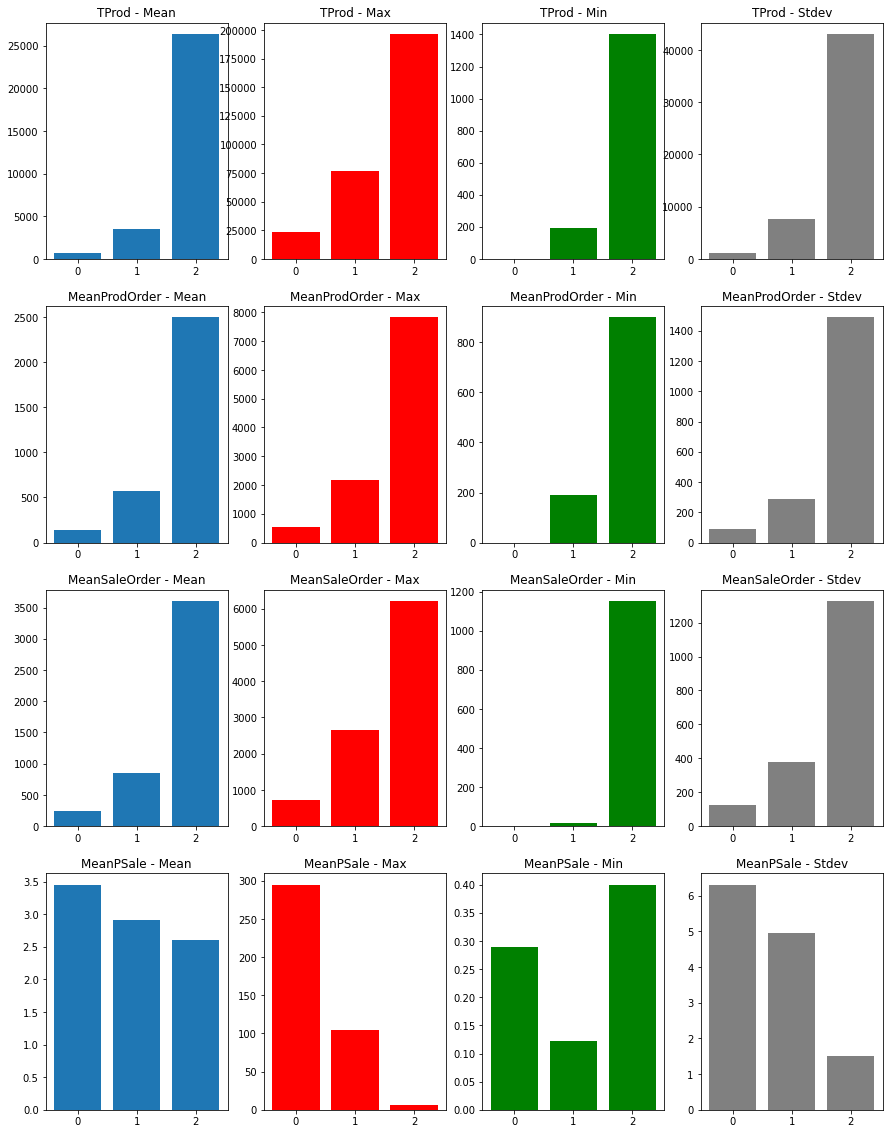

In [23]:
attr = df2.columns
clusters = range(len(clust_list_remaining))
fig, axs = plt.subplots(len(attr),4,figsize=(15,20))
for attr_index in range(len(attr)):
    mean_values = []
    max_values = []
    min_values = []
    stdev_values = []
    for cluster_df in clust_list_remaining:
        mean_values.append(cluster_df.describe()[attr[attr_index]][1])
        max_values.append(cluster_df.describe()[attr[attr_index]][7])
        min_values.append(cluster_df.describe()[attr[attr_index]][3])
        stdev_values.append(cluster_df.describe()[attr[attr_index]][2])
    axs[attr_index][0].bar(clusters, mean_values)
    axs[attr_index][0].set_title(f"{attr[attr_index]} - Mean")
    axs[attr_index][1].bar(clusters, max_values, color = 'r')
    axs[attr_index][1].set_title(f"{attr[attr_index]} - Max")
    axs[attr_index][2].bar(clusters, min_values, color = 'g')
    axs[attr_index][2].set_title(f"{attr[attr_index]} - Min")
    axs[attr_index][3].bar(clusters, stdev_values, color = 'gray')
    axs[attr_index][3].set_title(f"{attr[attr_index]} - Stdev")

In [26]:
clust_list_remaining[2].sort_values(by=['TOrder'])

,TProd,DProd,MaxPO,MinPO,MeanProdOrder,TSale,MinPSale,MaxPSale,MeanSaleOrder,TRProd,MeanPSale,TOrder,SETSaleQta,SESaleQtaOrder,Cluster
CustomerID,,,,,,,,,,,,,,,
15195,1404,1,1404,1404,1404.000,3861.00,3861.00,3861.00,3861.000,0,2.750,1,0.000,0.000,3
16754,4280,2,4280,4280,4280.000,2002.40,518.40,1484.00,2002.400,0,0.620,1,1.000,0.000,3
12357,2708,131,2708,2708,2708.000,6207.67,10.08,237.60,6207.670,0,3.349,1,5.292,0.000,3
12752,2262,53,2262,2262,2262.000,4366.78,13.20,270.00,4366.780,0,2.294,1,4.622,0.000,3
18251,7824,16,7824,7824,7824.000,4314.72,138.24,696.00,4314.720,0,0.772,1,2.733,0.000,3
12688,3028,171,3028,3028,3028.000,4873.81,2.88,135.00,4873.810,0,4.125,1,5.851,0.000,3
12378,2529,219,2529,2529,2529.000,4008.62,4.68,69.36,4008.620,0,2.997,1,5.540,0.000,3
15372,2924,27,2924,2924,2924.000,2007.40,30.24,179.00,2007.400,0,0.825,1,3.764,0.000,3
13135,4300,1,4300,4300,4300.000,3096.00,3096.00,3096.00,3096.000,0,0.720,1,0.000,0.000,3


In [25]:
clust_dict

{0: 3857, 1: 1, 2: 450, 3: 25}

In [ ]:
# aggiungi centers without last cluster
# aggiungi parte per rimuovere il last cluster
# aggiungi grafici in data understanding